In [5]:
'''
try:
  # %tensorflow_version only exists in Colab.
  get_ipython().run_line_magic('tensorflow_version', '2.x')
except Exception:
  pass
'''

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split


 We define a few utilities for data conversion and visualization to make our code more neat.

In [6]:
def norm(x):
    return (x - train_stats['mean']) / (train_stats['std'])

def plot_diff(y_true, y_pred, title = ''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()

def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color = 'blue', label = metric_name)
    plt.plot(history.history['val_' + metric_name], color = 'green', label = 'val_' + metric_name)
    plt.show()


In [7]:
# Specify data URI

# Use pandas excel reader
df = pd.read_excel("ENB2012_data.xls" , )
df = df.sample(frac=1).reset_index(drop = True)

df

X1     X2     X3     X4   X5  X6    X7  X8     Y1     Y2
0    0.64  784.0  343.0  220.5  3.5   2  0.10   5  15.16  19.24
1    0.74  686.0  245.0  220.5  3.5   5  0.25   4  12.43  15.35
2    0.66  759.5  318.5  220.5  3.5   5  0.10   2  11.43  14.74
3    0.82  612.5  318.5  147.0  7.0   3  0.40   1  29.91  29.13
4    0.86  588.0  294.0  147.0  7.0   5  0.40   2  31.64  36.86
..    ...    ...    ...    ...  ...  ..   ...  ..    ...    ...
763  0.82  612.5  318.5  147.0  7.0   4  0.10   2  23.67  24.80
764  0.76  661.5  416.5  122.5  7.0   5  0.00   0  23.93  29.40
765  0.79  637.0  343.0  147.0  7.0   2  0.25   3  39.04  45.13
766  0.82  612.5  318.5  147.0  7.0   2  0.10   1  23.53  27.31
767  0.66  759.5  318.5  220.5  3.5   3  0.10   5  11.34  14.81

[768 rows x 10 columns]

In [8]:
# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size = 0.2)

train

X1     X2     X3      X4   X5  X6    X7  X8     Y1     Y2
12   0.64  784.0  343.0  220.50  3.5   3  0.10   4  15.19  19.25
221  0.98  514.5  294.0  110.25  7.0   3  0.25   3  28.56  29.78
181  0.66  759.5  318.5  220.50  3.5   4  0.10   4  11.33  15.00
631  0.76  661.5  416.5  122.50  7.0   2  0.25   3  35.99  36.07
69   0.79  637.0  343.0  147.00  7.0   4  0.40   2  42.74  38.84
..    ...    ...    ...     ...  ...  ..   ...  ..    ...    ...
356  0.79  637.0  343.0  147.00  7.0   4  0.10   3  36.97  35.10
726  0.86  588.0  294.0  147.00  7.0   5  0.40   3  31.84  31.60
149  0.86  588.0  294.0  147.00  7.0   4  0.40   5  31.12  36.26
24   0.76  661.5  416.5  122.50  7.0   2  0.10   2  33.16  33.91
765  0.79  637.0  343.0  147.00  7.0   2  0.25   3  39.04  45.13

[614 rows x 10 columns]

In [9]:
train_stats = train.describe()
train_stats


X1          X2          X3          X4          X5          X6  \
count  614.000000  614.000000  614.000000  614.000000  614.000000  614.000000   
mean     0.764821  671.236156  318.539902  176.348127    5.255700    3.508143   
std      0.106496   88.513386   43.708339   45.294904    1.751418    1.123281   
min      0.620000  514.500000  245.000000  110.250000    3.500000    2.000000   
25%      0.660000  588.000000  294.000000  122.500000    3.500000    3.000000   
50%      0.760000  661.500000  318.500000  147.000000    7.000000    4.000000   
75%      0.860000  759.500000  343.000000  220.500000    7.000000    5.000000   
max      0.980000  808.500000  416.500000  220.500000    7.000000    5.000000   

               X7          X8          Y1          Y2  
count  614.000000  614.000000  614.000000  614.000000  
mean     0.235098    2.799674   22.301873   24.628371  
std      0.134147    1.537121    9.981266    9.434731  
min      0.000000    0.000000    6.010000   10.900000  
25%      0.100000    2.000000   13.025000   15.802500  
50%      0.250000    3.000000   19.125000   22.625000  
75%      0.400000    4.000000   31.470000   32.945000  
max      0.400000    5.000000   43.100000   48.030000

In [10]:
# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_stats

count        mean        std     min     25%     50%     75%     max
X1  614.0    0.764821   0.106496    0.62    0.66    0.76    0.86    0.98
X2  614.0  671.236156  88.513386  514.50  588.00  661.50  759.50  808.50
X3  614.0  318.539902  43.708339  245.00  294.00  318.50  343.00  416.50
X4  614.0  176.348127  45.294904  110.25  122.50  147.00  220.50  220.50
X5  614.0    5.255700   1.751418    3.50    3.50    7.00    7.00    7.00
X6  614.0    3.508143   1.123281    2.00    3.00    4.00    5.00    5.00
X7  614.0    0.235098   0.134147    0.00    0.10    0.25    0.40    0.40
X8  614.0    2.799674   1.537121    0.00    2.00    3.00    4.00    5.00

In [11]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2

train_Y = format_output(train)
test_Y = format_output(test)

train_Y

(array([15.19, 28.56, 11.33, 35.99, 42.74, 24.31, 39.01, 12.43, 14.53,
        19.68, 12.3 , 38.82, 12.85, 14.51, 12.17, 14.32,  6.77, 15.23,
        29.87,  6.85, 29.06, 16.76, 32.31, 15.09, 14.9 , 14.44, 10.72,
        24.32, 30.05, 41.92, 14.6 , 28.64, 16.48, 38.84, 12.27, 25.7 ,
        12.43, 32.4 , 15.4 , 10.07, 26.33, 35.45, 36.57, 29.67, 12.97,
        29.62, 28.05, 14.33, 13.91, 12.34, 15.98, 29.14, 12.45, 10.35,
        36.71, 16.66, 32.31, 15.55, 39.83, 11.6 , 39.84, 14.39, 33.12,
        35.89, 28.67, 28.6 , 28.37, 35.56, 25.17, 15.09, 14.54, 31.28,
        17.17, 18.9 , 40.19, 10.8 , 32.07, 38.57, 11.69, 32.82, 14.75,
        25.48, 29.79, 36.13, 28.05, 12.72, 26.97, 11.53, 32.05, 15.37,
        12.92, 15.34, 16.86, 15.55, 14.65, 29.08, 12.41, 28.52, 36.95,
        32.4 , 16.64, 35.69, 24.63, 17.11, 13.04, 14.71, 14.6 , 39.04,
        24.23, 15.23, 12.87, 10.68, 38.33, 18.71, 26.47, 32.31, 40.78,
        26.45, 10.77, 10.78, 16.74, 32.29, 25.66, 36.06, 11.42, 14.62,
      

In [12]:
# Normalize the training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)

# Build the Model

Here is how we'll build the model using the functional syntax. Notice that we can specify a list of outputs (i.e. `[y1_output, y2_output]`) when we instantiate the `Model()` class.

In [13]:
len(train .columns)

8

In [14]:
# Define model layers.
input_layer = Input(shape=(len(train .columns),))

first_dense = Dense(units='128', activation='relu')(input_layer)

second_dense = Dense(units='128', activation='relu')(first_dense)


In [15]:
# Y1 output will be fed directly from the second dense
y1_output = Dense (units='1', name = 'y1_output')(second_dense)
third_dense = Dense(units = '64', activation = 'relu')(second_dense)

# Y2 output will come via the third dense
y2_output = Dense(units='1', name='y2_output')(third_dense)

In [16]:
# Define the model with the input layer and a list of output layers
model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

In [17]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          1152        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          16512       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 64)           8256        ['dense_1[0][0]']                
                                                                                              

# Configure parameters

We specify the optimizer as well as the loss and metrics for each output.


In [18]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(lr=0.001)

model.compile(optimizer = optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics = {'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                         'y2_output': tf.keras.metrics.RootMeanSquaredError()})

C:\Users\pooya\anaconda3\envs\tf_gpu\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Train the Model

In [21]:
# Train the model for 20 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs = 100, batch_size = 10, validation_data = (norm_test_X, test_Y))

Epoch 1/100
62/62 [==============================] - 1s 11ms/step - loss: 2.8052 - y1_output_loss: 0.6166 - y2_output_loss: 2.1885 - y1_output_root_mean_squared_error: 0.7853 - y2_output_root_mean_squared_error: 1.4794 - val_loss: 10.1932 - val_y1_output_loss: 3.3884 - val_y2_output_loss: 6.8048 - val_y1_output_root_mean_squared_error: 1.8408 - val_y2_output_root_mean_squared_error: 2.6086
Epoch 2/100
62/62 [==============================] - 1s 10ms/step - loss: 4.2604 - y1_output_loss: 0.9991 - y2_output_loss: 3.2613 - y1_output_root_mean_squared_error: 0.9996 - y2_output_root_mean_squared_error: 1.8059 - val_loss: 2.8519 - val_y1_output_loss: 0.7189 - val_y2_output_loss: 2.1330 - val_y1_output_root_mean_squared_error: 0.8479 - val_y2_output_root_mean_squared_error: 1.4605
Epoch 3/100
62/62 [==============================] - 1s 11ms/step - loss: 4.6957 - y1_output_loss: 1.0653 - y2_output_loss: 3.6304 - y1_output_root_mean_squared_error: 1.0321 - y2_output_root_mean_squared_error: 1.9

Epoch 22/100
62/62 [==============================] - 1s 10ms/step - loss: 2.5813 - y1_output_loss: 0.5002 - y2_output_loss: 2.0811 - y1_output_root_mean_squared_error: 0.7072 - y2_output_root_mean_squared_error: 1.4426 - val_loss: 2.6396 - val_y1_output_loss: 0.7509 - val_y2_output_loss: 1.8887 - val_y1_output_root_mean_squared_error: 0.8665 - val_y2_output_root_mean_squared_error: 1.3743
Epoch 23/100
62/62 [==============================] - 1s 10ms/step - loss: 2.2616 - y1_output_loss: 0.4067 - y2_output_loss: 1.8549 - y1_output_root_mean_squared_error: 0.6377 - y2_output_root_mean_squared_error: 1.3619 - val_loss: 3.0330 - val_y1_output_loss: 0.6729 - val_y2_output_loss: 2.3601 - val_y1_output_root_mean_squared_error: 0.8203 - val_y2_output_root_mean_squared_error: 1.5363
Epoch 24/100
62/62 [==============================] - 1s 10ms/step - loss: 2.0867 - y1_output_loss: 0.4246 - y2_output_loss: 1.6621 - y1_output_root_mean_squared_error: 0.6516 - y2_output_root_mean_squared_error: 1

Epoch 43/100
62/62 [==============================] - 1s 14ms/step - loss: 1.9980 - y1_output_loss: 0.4231 - y2_output_loss: 1.5749 - y1_output_root_mean_squared_error: 0.6505 - y2_output_root_mean_squared_error: 1.2550 - val_loss: 7.8669 - val_y1_output_loss: 1.3160 - val_y2_output_loss: 6.5508 - val_y1_output_root_mean_squared_error: 1.1472 - val_y2_output_root_mean_squared_error: 2.5595
Epoch 44/100
62/62 [==============================] - 1s 14ms/step - loss: 2.7689 - y1_output_loss: 0.5326 - y2_output_loss: 2.2363 - y1_output_root_mean_squared_error: 0.7298 - y2_output_root_mean_squared_error: 1.4954 - val_loss: 6.8162 - val_y1_output_loss: 1.1326 - val_y2_output_loss: 5.6835 - val_y1_output_root_mean_squared_error: 1.0643 - val_y2_output_root_mean_squared_error: 2.3840
Epoch 45/100
62/62 [==============================] - 1s 13ms/step - loss: 2.4068 - y1_output_loss: 0.4855 - y2_output_loss: 1.9213 - y1_output_root_mean_squared_error: 0.6968 - y2_output_root_mean_squared_error: 1

Epoch 64/100
62/62 [==============================] - 2s 31ms/step - loss: 2.3142 - y1_output_loss: 0.4593 - y2_output_loss: 1.8549 - y1_output_root_mean_squared_error: 0.6778 - y2_output_root_mean_squared_error: 1.3619 - val_loss: 2.0908 - val_y1_output_loss: 0.5327 - val_y2_output_loss: 1.5582 - val_y1_output_root_mean_squared_error: 0.7298 - val_y2_output_root_mean_squared_error: 1.2483
Epoch 65/100
62/62 [==============================] - 1s 22ms/step - loss: 1.7506 - y1_output_loss: 0.2953 - y2_output_loss: 1.4553 - y1_output_root_mean_squared_error: 0.5434 - y2_output_root_mean_squared_error: 1.2063 - val_loss: 1.8941 - val_y1_output_loss: 0.4440 - val_y2_output_loss: 1.4501 - val_y1_output_root_mean_squared_error: 0.6663 - val_y2_output_root_mean_squared_error: 1.2042
Epoch 66/100
62/62 [==============================] - 1s 13ms/step - loss: 1.7825 - y1_output_loss: 0.3208 - y2_output_loss: 1.4617 - y1_output_root_mean_squared_error: 0.5664 - y2_output_root_mean_squared_error: 1

Epoch 85/100
62/62 [==============================] - 1s 14ms/step - loss: 1.7661 - y1_output_loss: 0.3209 - y2_output_loss: 1.4452 - y1_output_root_mean_squared_error: 0.5664 - y2_output_root_mean_squared_error: 1.2022 - val_loss: 4.2427 - val_y1_output_loss: 1.3443 - val_y2_output_loss: 2.8985 - val_y1_output_root_mean_squared_error: 1.1594 - val_y2_output_root_mean_squared_error: 1.7025
Epoch 86/100
62/62 [==============================] - 1s 13ms/step - loss: 1.9858 - y1_output_loss: 0.4085 - y2_output_loss: 1.5773 - y1_output_root_mean_squared_error: 0.6391 - y2_output_root_mean_squared_error: 1.2559 - val_loss: 1.6646 - val_y1_output_loss: 0.4797 - val_y2_output_loss: 1.1849 - val_y1_output_root_mean_squared_error: 0.6926 - val_y2_output_root_mean_squared_error: 1.0885
Epoch 87/100
62/62 [==============================] - 1s 14ms/step - loss: 1.8963 - y1_output_loss: 0.3776 - y2_output_loss: 1.5187 - y1_output_root_mean_squared_error: 0.6145 - y2_output_root_mean_squared_error: 1

In [22]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))


5/5 [==============================] - 0s 9ms/step - loss: 1.5968 - y1_output_loss: 0.5181 - y2_output_loss: 1.0787 - y1_output_root_mean_squared_error: 0.7198 - y2_output_root_mean_squared_error: 1.0386
Loss = 1.5968260765075684, Y1_loss = 0.5181348919868469, Y1_mse = 0.7198158502578735, Y2_loss = 1.0786911249160767, Y2_mse = 1.0386005640029907


5/5 [==============================] - 0s 5ms/step


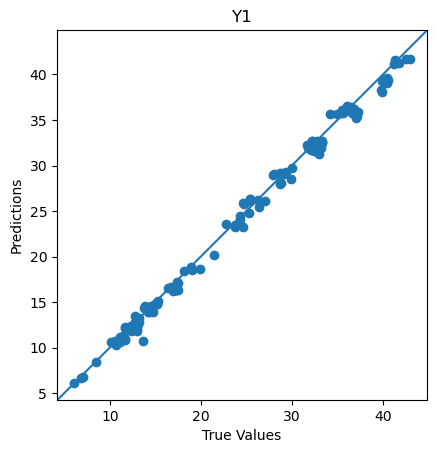

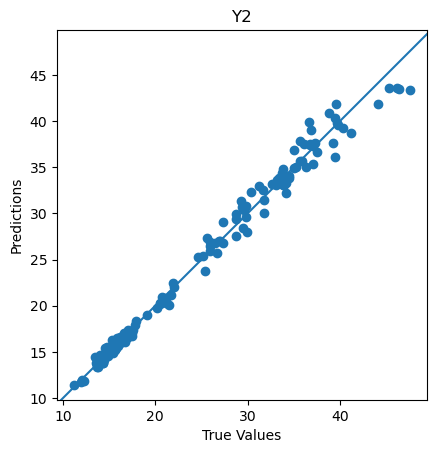

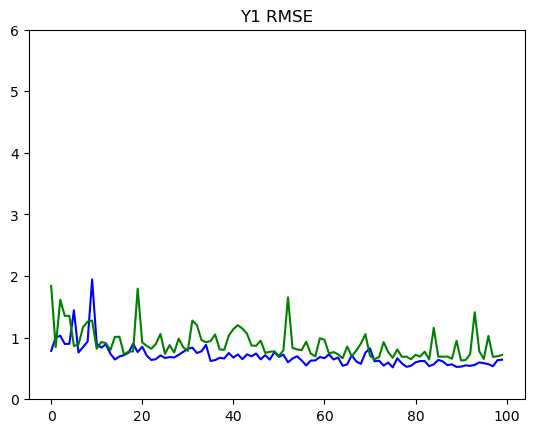

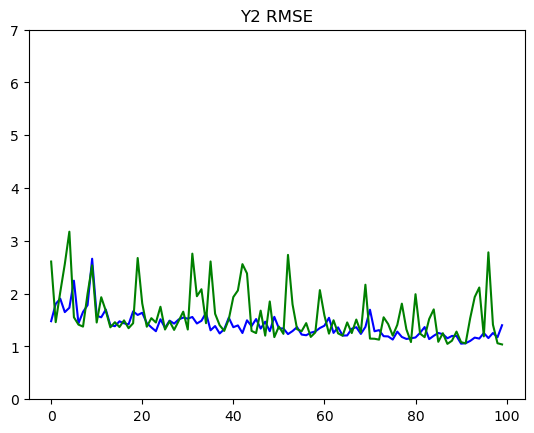

In [23]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)